# **Problem Statemen:** Electricity Consumption Prediction

## **Description:**


* **Electricity consumption and price prediction is the process of using mathematical models to predict what electricity, price consumption will be in the future. This can be a difficult task, as electricity consumption, price are affected by a number of factors, including:**

* **Supply and demand:** The price of electricity is determined by the supply and demand for electricity. When demand is high and supply is low, prices will be high. When demand is low and supply is high, prices will be low.
* **Weather:** The weather can have a significant impact on electricity prices. For example, hot weather can increase demand for air conditioning, which can lead to higher electricity prices.
* **Economic conditions:** The economy can also have an impact on electricity prices. For example, during a recession, demand for electricity may decline, which can lead to lower prices.
* **Government policies:** Government policies can also affect electricity prices. For example, government subsidies for renewable energy can lead to lower electricity prices.

* There are a number of different methods that can be used to predict electricity prices. Some of the most common methods include:

* **Statistical methods:** Statistical methods use historical data to predict future prices. These methods can be relatively simple to use, but they may not be very accurate for predicting prices in the long term.
* **Machine learning methods:** Machine learning methods use artificial intelligence to learn from historical data and predict future prices. These methods can be more accurate than statistical methods, but they can also be more complex to use.
* **Hybrid methods:** Hybrid methods combine statistical methods and machine learning methods to improve the accuracy of predictions.

## Time Series


* **Electricity price prediction is the process of forecasting future electricity prices. This can be done using a variety of methods, including time series analysis. Time series analysis is a statistical technique that uses historical data to predict future trends.**

There are many different time series models that can be used for electricity price prediction. Some of the most common models include:

* **Autoregressive moving average (ARMA) models:** ARMA models are univariate models, which means that they only consider one variable, in this case electricity price. ARMA models are relatively simple to understand and implement, but they can be less accurate than other models.
Autoregressive integrated moving average (ARIMA) models: ARIMA models are a generalization of ARMA models. ARIMA models can be used to forecast data that has trends, seasonality, and/or noise. ARIMA models are more accurate than ARMA models, but they can be more difficult to understand and implement.

* **Vector autoregressive (VAR) models:** VAR models are multivariate models, which means that they can consider multiple variables, such as electricity price, weather, and economic activity. VAR models are more accurate than ARMA and ARIMA models, but they can be more difficult to understand and implement.

* **The best time series model for electricity price prediction depends on the specific data set and the desired accuracy. In general, ARMA and ARIMA models are a good choice for simple data sets with limited trends and seasonality. VAR models are a good choice for more complex data sets with trends, seasonality, and/or noise.**


# 1. Imporitng Libraries

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize']=10,6

# 2. The Datasets

In [81]:

df=pd.read_csv('/kaggle/input/electric-production/Electric_Production.csv')
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


## 2.1 DataSets Summary

* **The Year, Month, Day, and Hour columns are all categorical variables. The Electricity Production (GWh) column is a numerical variable.**

Here is a brief explanation of each feature:

* **Year:** The year in which the electricity production was recorded.
* **Month:** The month in which the electricity production was recorded.
* **Day:** The day of the month in which the electricity production was recorded.
* **Hour:** The hour of the day in which the electricity production was recorded.
* **Electricity Production (GWh):** The amount of electricity produced in gigawatt-hours (GWh) on the given day and hour.


## 2.2 Droping Null value

In [82]:
df.isnull()

,DATE,Value
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
392,False,False
393,False,False
394,False,False
395,False,False


In [83]:
df.isnull().sum()

DATE     0
Value    0
dtype: int64

* But Still run that command

In [84]:
df.dropna()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151
...,...,...
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212


## 2.3 Date Index

* **Here we are going to set *Date* as index and rename both feature**

In [85]:
df.columns=['Date','Consumption']
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.head()

,Consumption
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [87]:
df.describe()

,Consumption
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


# 3.0 Visualization

In [88]:
plt.style.use('dark_background')

* **Consumption V/s Date**

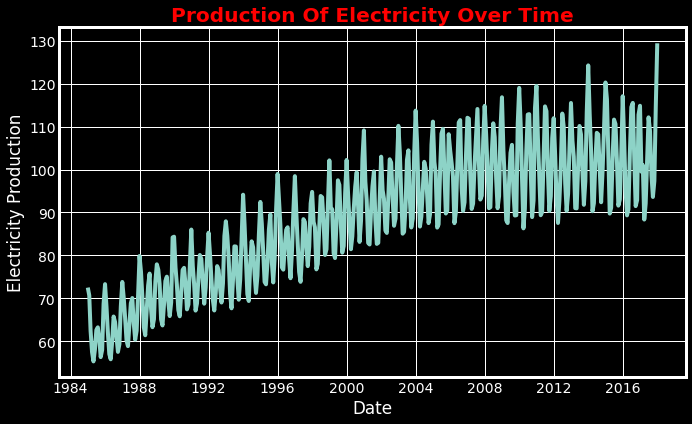

In [89]:
plt.xlabel('Date')
plt.ylabel('Electricity Production')
plt.title('Production Of Electricity Over Time',color='red',weight='bold')
plt.plot(df)
plt.show()

* **The graph would show that electricity production has been increasing over time. The increase in production could be due to a number of factors, such as an increase in demand for electricity, an increase in the number of power plants, or an improvement in the efficiency of power plants.**

* **In the above graph, the standard deviation is relatively low, which indicates that the data points tend to be very close to the mean. The variance is also relatively low, which further supports this conclusion. The trend in the graph is upward, which indicates that the data points are generally increasing over time.**

* **Let's see What exactly look like Distribution**

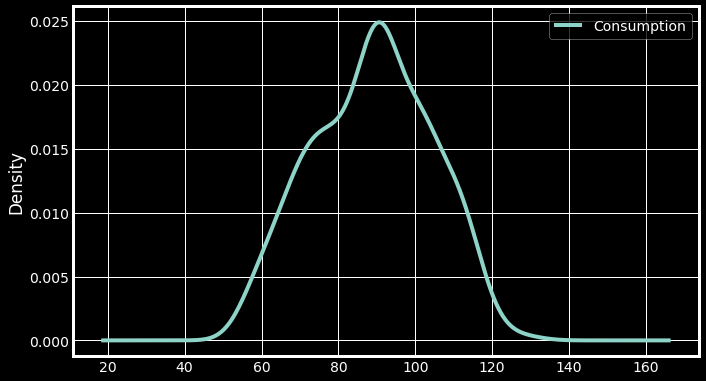

In [90]:
df.plot(kind='kde')

We can observe a near-normal distribution(bell-curve) over consumption values.


Also, a given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

**Level**: The average value in the series.

**Trend**: The increasing or decreasing value in the series.

**Seasonality**: The repeating short-term cycle in the series.

**Noise**: The random variation in the series.

In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.


So let us separate Trend and Seasonality from the time series.

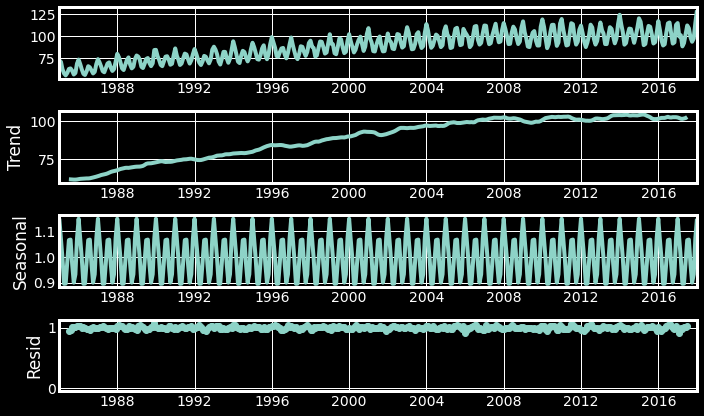

In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Import the `seasonal_decompose` function from the `statsmodels.tsa.seasonal` module.

result = seasonal_decompose(df, model='multiplicative')

# Decompose the time series `df` into its seasonal, trend, and residual components using the multiplicative model.

result.plot()

# Plot the decomposed time series.

plt.show()

# Show the plot.


* **This gives us more insight into our data and real-world actions. Clearly, there is an upward trend and a recurring event where electricity consumption shoots maximum every year.**

## 3.1 Stationarising the time series

* **Stationarizing a time series is the process of transforming it so that it becomes stationary. A stationary time series is one whose statistical properties do not change over time. This means that the mean, variance, and autocorrelation of the series are constant over time.**



### 3.1.1 ADF

* **The augmented Dickey–Fuller (ADF) test is a statistical test used to test whether a given time series is stationary or not. It is an augmented version of the Dickey–Fuller test for a larger and more complicated set of time series models. The ADF statistic, used in the test, is a negative number. The more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.**

* **The ADF test is a non-parametric test, which means that it does not make any assumptions about the distribution of the data. This makes it a very versatile test that can be used on a wide variety of time series data.**

* **The ADF test is a very popular test for testing stationarity. It is relatively easy to understand and implement, and it has been shown to be very effective in detecting unit roots.**

Here are the steps involved in conducting an ADF test:

**1.Specify the model.** The ADF test can be used to test a variety of time series models. The most common model is the autoregressive (AR) model.

**2.Choose the lag order.** The lag order is the number of lags that will be included in the model. The lag order can be chosen using various methods, such as the Akaike information criterion (AIC) or the Bayesian information criterion (BIC).

**3.Estimate the model.** The model can be estimated using ordinary least squares (OLS).

**4.Calculate the ADF statistic.** The ADF statistic is calculated using the estimated model.

**5.Calculate the p-value.** The p-value is calculated from the ADF statistic.

**6.Make a decision.** The decision is made by comparing the p-value to a significance level. If the p-value is less than the significance level, then the null hypothesis is rejected and the alternative hypothesis is accepted. This means that there is evidence to suggest that the time series is not stationary.

* **The ADF test is a powerful tool for testing stationarity. However, it is important to note that the test is not perfect. The test can sometimes make a type I error, which means that it incorrectly rejects the null hypothesis. This can happen if the time series is actually stationary, but the ADF test finds evidence to suggest that it is not.**



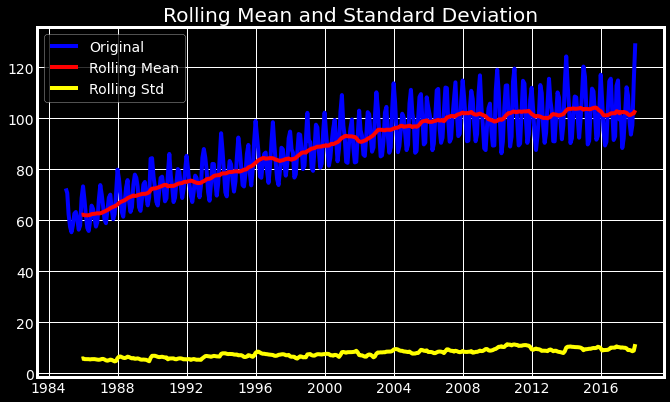

Results of Dickey-Fuller test
Test Statistics                 -2.256990
p-value                          0.186215
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [92]:
# Import the `adfuller` function from the `statsmodels.tsa.stattools` module.
from statsmodels.tsa.stattools import adfuller

# Define a function called `test_stationarity` that takes a timeseries as input.
def test_stationarity(timeseries):

    # Determine the rolling statistics of the timeseries.
    # This is done by calculating the mean and standard deviation of the timeseries over a rolling window of 12 periods.
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    # Plot the rolling statistics of the timeseries.
    # The original timeseries is plotted in blue, the rolling mean is plotted in red, and the rolling standard deviation is plotted in black.
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='yellow', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    # Perform the Dickey-Fuller test on the timeseries.
    # The Dickey-Fuller test is a statistical test that is used to determine if a timeseries is stationary.
    print('Results of Dickey-Fuller test')
    adft = adfuller(timeseries['Consumption'], autolag='AIC')

    # Create a pandas Series object to store the results of the Dickey-Fuller test.
    # The Series object will have four columns:
    #   - Test Statistics
    #   - p-value
    #   - Number of lags used
    #   - Number of observations used
    output = pd.Series(adft[0:4], index=['Test Statistics', 'p-value', 'No. of lags used', 'Number of observations used'])

    # Iterate over the dictionary object returned by the `adfuller` function and add the critical values to the `output` Series object.
    # The critical values are used to determine if the timeseries is stationary.
    for key, values in adft[4].items():
        output['critical value (%s)' % key] = values

    # Print the `output` Series object.
    print(output)

# Test the stationarity of the `df` timeseries.
test_stationarity(df)


* **We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.**


To get a stationary series, we need to eliminate the trend and seasonality from the series.


* **We start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. Then after getting the log of the series, we find the rolling average of the series. A rolling average is calculated by taking input for the past 12 months and giving a mean consumption value at every point further ahead in series.**

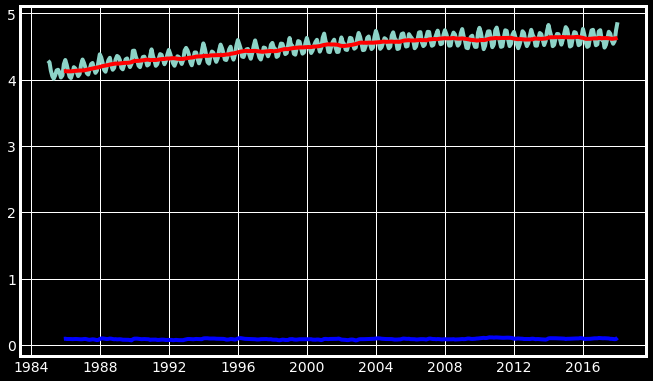

In [93]:
df_log = np.log(df)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.plot(df_log)
plt.plot(moving_avg, color="red")
plt.plot(std_dev, color ="blue")
plt.show()

* After finding the mean, we take the difference of the series and the mean at every point in the series.

* This way, we eliminate trends out of a series and obtain a more stationary series.

In [94]:
df_log_moving_avg_diff = df_log-moving_avg
df_log_moving_avg_diff.dropna(inplace=True)

* Perform ADF once again so test trend data

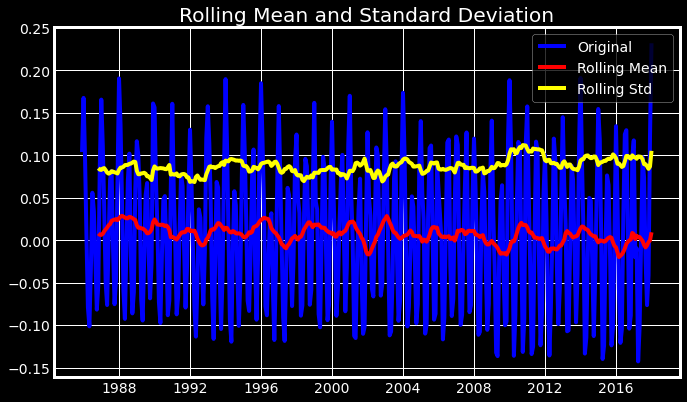

Results of Dickey-Fuller test
Test Statistics                 -5.211586
p-value                          0.000008
No. of lags used                15.000000
Number of observations used    370.000000
critical value (1%)             -3.448148
critical value (5%)             -2.869383
critical value (10%)            -2.570948
dtype: float64


In [95]:
test_stationarity(df_log_moving_avg_diff)

From the above graph, we observed that the data attained stationarity.

* **One of the modules is completed as we came to a conclusion. We need to check the weighted average, to understand the trend of the data in time series. Take the previous log data and to perform the following operation.**

In [96]:
weighted_average = df_log.ewm(halflife=12, min_periods=0,adjust=True).mean()

* **The exponential moving average (EMA) is a weighted average of the last n prices, where the weighting decreases exponentially with each previous price/period. In other words, the formula gives recent prices more weight than past prices.**

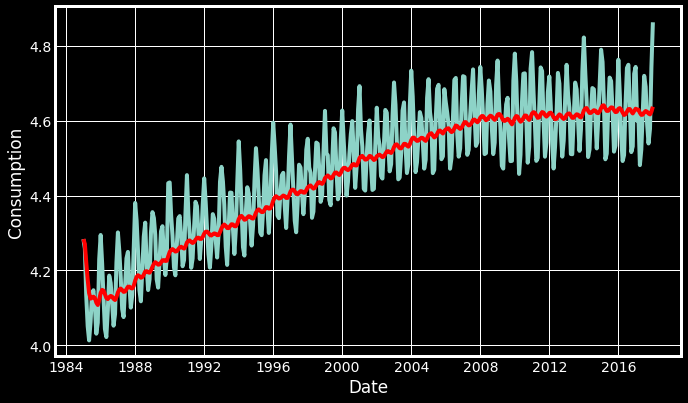

In [97]:
plt.plot(df_log)
plt.plot(weighted_average, color='red')
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.show(block =False)

Previously we subtracted df_log with moving average, now take the same df_log and subtract with weighted_average and perform the Dickey-Fuller test (ADFT) once again.

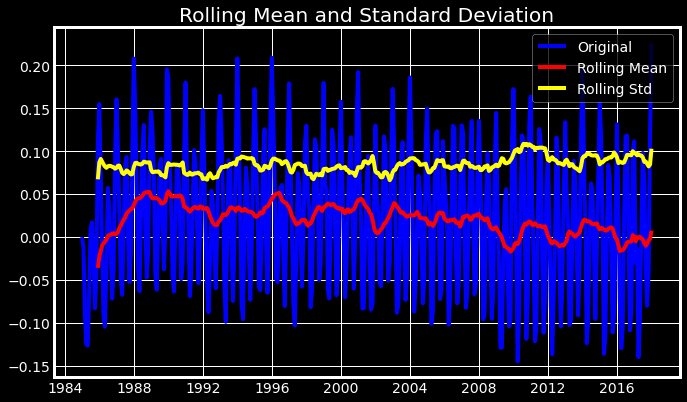

Results of Dickey-Fuller test
Test Statistics                 -3.251531
p-value                          0.017189
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [98]:
logScale_weightedMean = df_log-weighted_average
test_stationarity(logScale_weightedMean)

From the above graph, we observed that the data attained stationarity. We also see that the test statistics and critical value is relatively equal.

* **There can be cases when there is a high seasonality in the data. In those cases, just removing the trend will not help much. We need to also take care of the seasonality in the series. One such method for this task is differencing.**


* **Differencing is a method of transforming a time series dataset.
It can be used to remove the series dependence on time, so-called temporal dependence. This includes structures like trends and seasonality. Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality.**


Differencing is performed by subtracting the previous observation from the current observation.

Perform the Dickey-Fuller test (ADFT) once again.

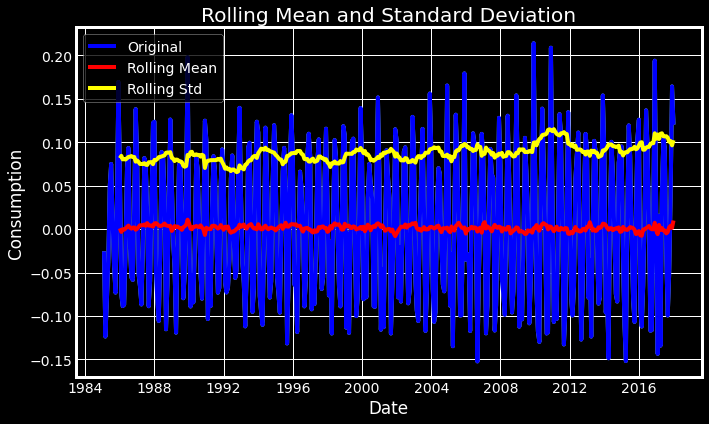

Results of Dickey-Fuller test
Test Statistics               -6.748333e+00
p-value                        2.995161e-09
No. of lags used               1.400000e+01
Number of observations used    3.810000e+02
critical value (1%)           -3.447631e+00
critical value (5%)           -2.869156e+00
critical value (10%)          -2.570827e+00
dtype: float64


In [99]:
df_log_diff = df_log - df_log.shift()
plt.title("Shifted timeseries")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.plot(df_log_diff)

#Let us test the stationarity of our resultant series
df_log_diff.dropna(inplace=True)
test_stationarity(df_log_diff)

* **The next step is to perform decomposition which provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model.**

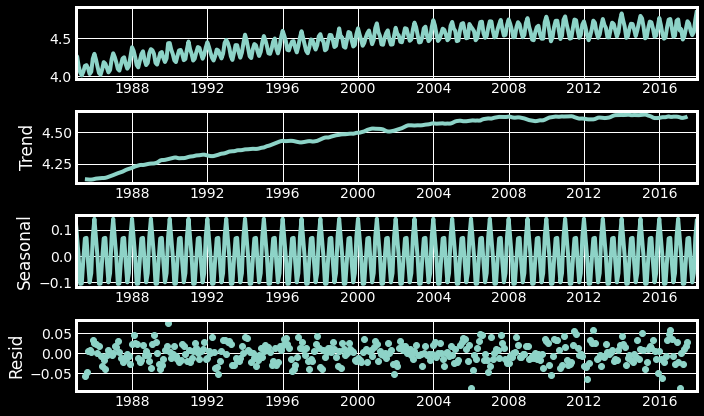

In [100]:
result = seasonal_decompose(df_log, model='additive',freq=12)
result.plot()
plt.show()

* ADFT once again

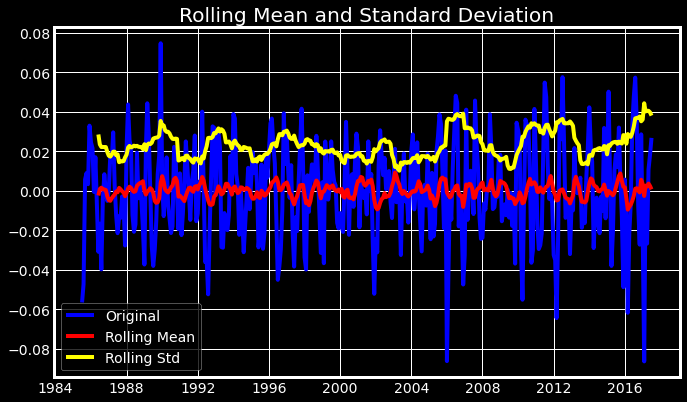

In [101]:
def test_stationarity_final(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='yellow', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)



trend = result.trend
trend.dropna(inplace=True)
seasonality = result.seasonal
seasonality.dropna(inplace=True)
residual = result.resid
residual.dropna(inplace=True)
test_stationarity_final(residual)

* After the decomposition, if we look at the residual then we have clearly a flat line for both mean and standard deviation. We have got our stationary series and now we can move to find the best parameters for our model.

* ACF and PACF plots

Before we go on to build our forecasting model, we need to determine optimal parameters for our model. For those optimal parameters, we need ACF and PACF plots.


A nonseasonal ARIMA model is classified as an “ARIMA(p,d,q)” model, where:

p → Number of autoregressive terms,
d → Number of nonseasonal differences needed for stationarity, and
q → Number of lagged forecast errors in the prediction equation.


Values of p and q come through ACF and PACF plots. So let us understand both ACF and PACF!

#### Autocorrelation Function(ACF)

Statistical correlation summarizes the strength of the relationship between two variables. Pearson’s correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.


We can calculate the correlation for time series observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.


A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.


#### Partial Autocorrelation Function(PACF)

A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.


The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.


The autocorrelation for observation and observation at a prior time step is comprised of both the direct correlation and indirect correlations. It is these indirect correlations that the partial autocorrelation function seeks to remove.


Below code plots, both ACF and PACF plots for us:

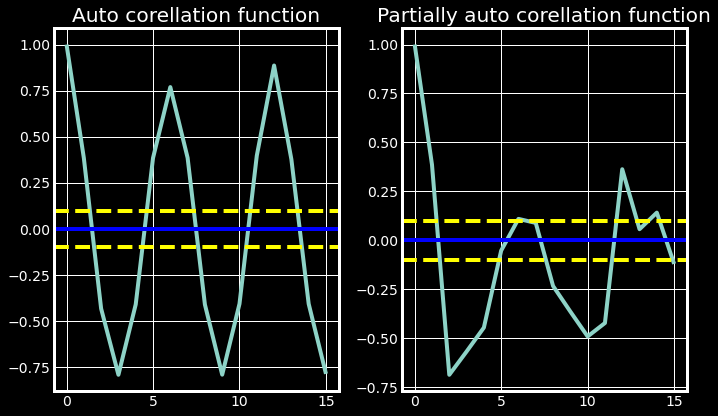

In [102]:
from statsmodels.tsa.stattools import acf,pacf
# we use d value here(data_log_shift)
acf = acf(df_log_diff, nlags=15)
pacf= pacf(df_log_diff, nlags=15,method='ols')#plot PACF
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='yellow')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='yellow')
plt.title('Auto corellation function')
plt.tight_layout()#plot ACF
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='yellow')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='yellow')
plt.title('Partially auto corellation function')
plt.tight_layout()

# 4.0 Model Training

In order to find the p and q values from the above graphs, we need to check, where the graph cuts off the origin or drops to zero for the first time from the above graphs the p and q values are merely close to 3 where the graph cuts off the origin ( draw the line to x-axis) now we have p,d,q values. So now we can substitute in the ARIMA model and let's see the output.

RSS : 0.522683


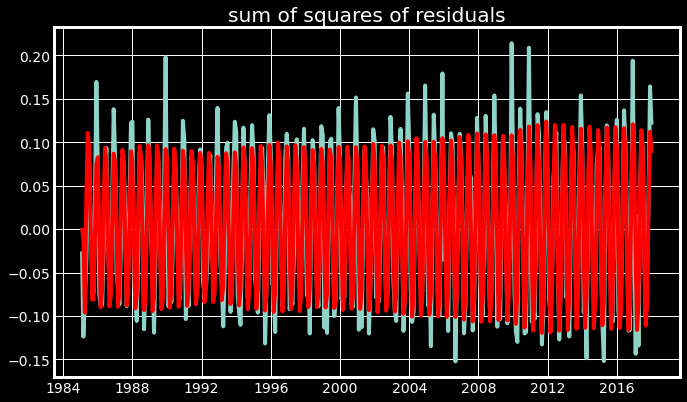

In [105]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_log, order=(3,1,3))
result_AR = model.fit(disp = 0)
plt.plot(df_log_diff)
plt.plot(result_AR.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((result_AR.fittedvalues-df_log_diff["Consumption"])**2))

# 6. Prediction

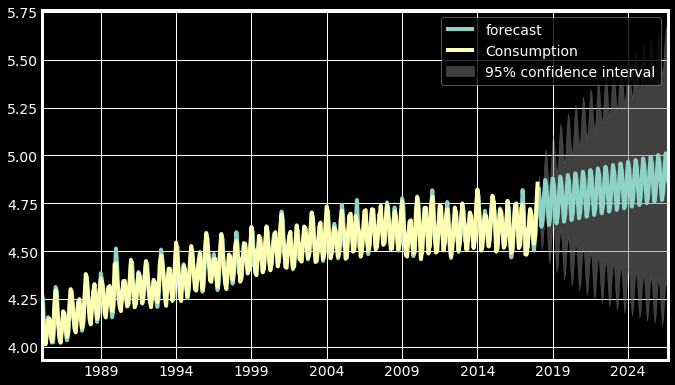

In [106]:
result_AR.plot_predict(1,500)
x=result_AR.forecast(steps=300)

From the above graph, we calculated the future predictions till 2024 the greyed out area is the confidence interval that means the predictions will not cross that area.

# Reference:
https://www.kaggle.com/code/nageshsingh/predict-electricity-consumption

# Thank You